In [2]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from datetime import datetime
from plugins.charts_sketcher import request_to_df_ambito_api
from plugins.charts_sketcher import set_seaborn_style, draw_country_risk_plot, draw_inflacion_plot, draw_tna_plot, draw_bm_plot
# from plugins.seaborn_styling_func import set_seaborn_style
set_seaborn_style('Cambria', background_color='#242c4f', grid_color='#546476', text_color='#d7dbe3')

# Resgo País

'09-08-2019'

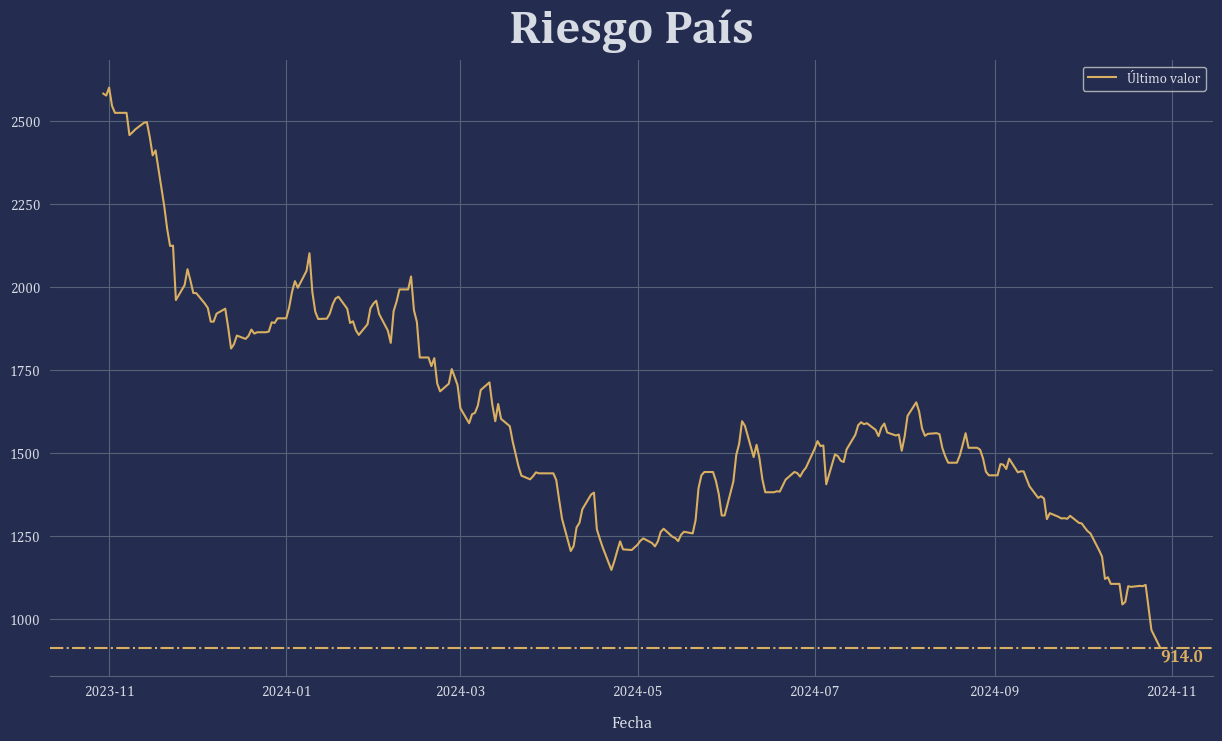

In [3]:
draw_country_risk_plot()

# Inflación

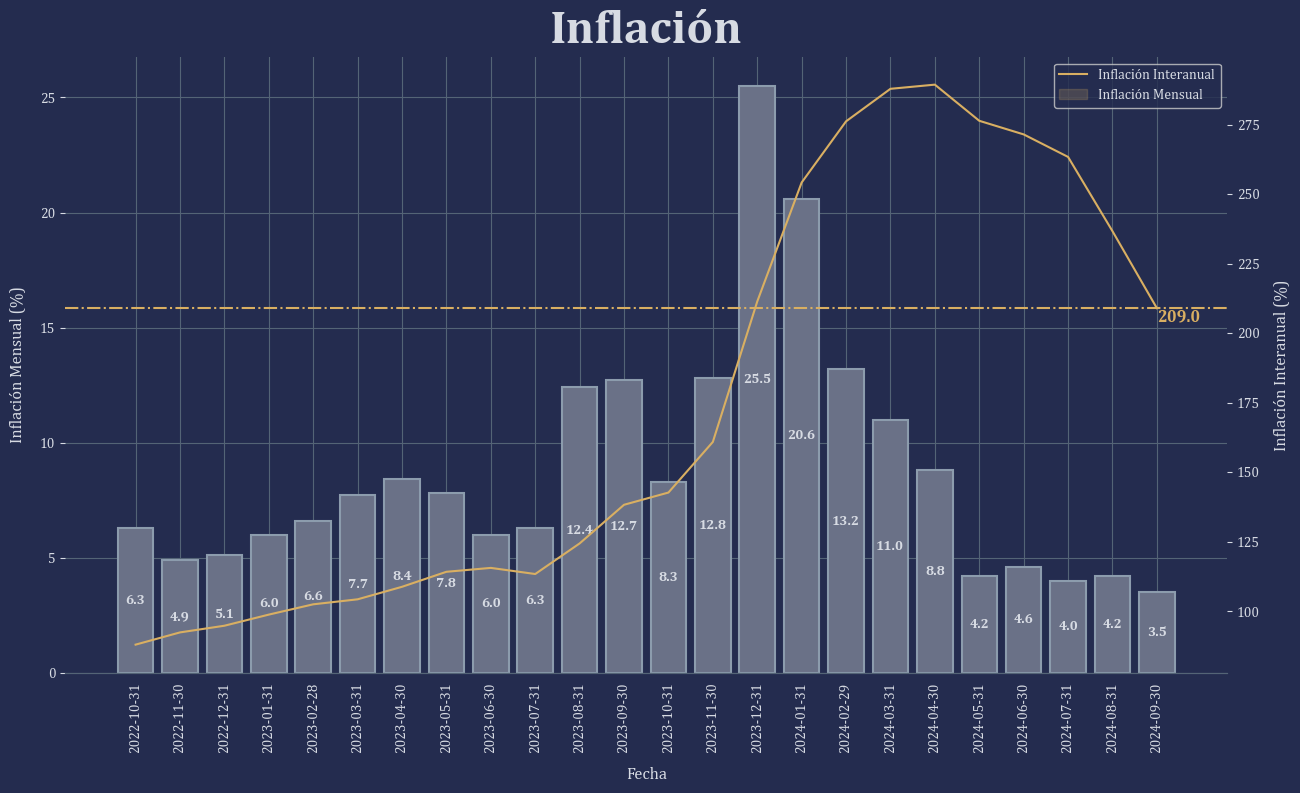

In [4]:
draw_inflacion_plot()

# Tasa de depósitos y prestamos

In [5]:
draw_tna_plot()

https://api.bcra.gob.ar/estadisticas/v2.0/DatosVariable/12/2023-10-29/2024-10-29
HTTPSConnectionPool(host='api.bcra.gob.ar', port=443): Max retries exceeded with url: /estadisticas/v2.0/DatosVariable/12/2023-10-29/2024-10-29 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)')))


TypeError: 'NoneType' object is not subscriptable

# Base Monetaria, Circulación Monetaria

In [ ]:
draw_bm_plot()

HTTPSConnectionPool(host='api.bcra.gob.ar', port=443): Max retries exceeded with url: /estadisticas/v2.0/DatosVariable/15/2023-10-29/2024-10-29/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1129)')))


TypeError: 'NoneType' object is not subscriptable